# Orientation of a FAST keypoint

As described in the ORB paper.

<http://www.willowgarage.com/sites/default/files/orb_final.pdf>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
%matplotlib inline

(450, 600)


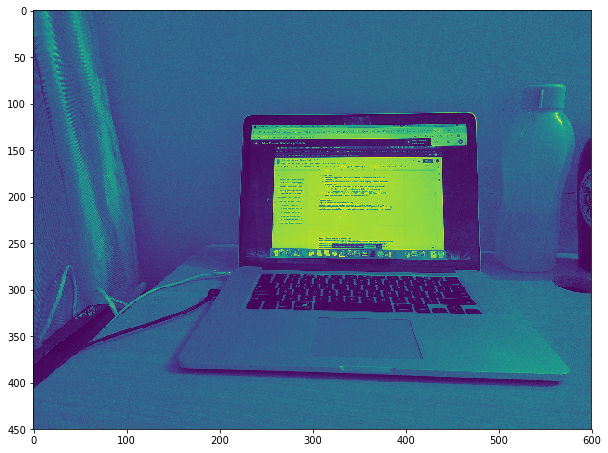

In [4]:
img = cv2.imread('/Users/tejaswin.p/Downloads/Fast_Brief/IMG_20200415_162336.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (0, 0), fx=0.15, fy=0.15)
print img.shape
plt.figure(figsize=(10, 10))
plt.imshow(img);

In [16]:
fast = cv2.FastFeatureDetector_create(threshold=150)
keypoints = fast.detect(img)

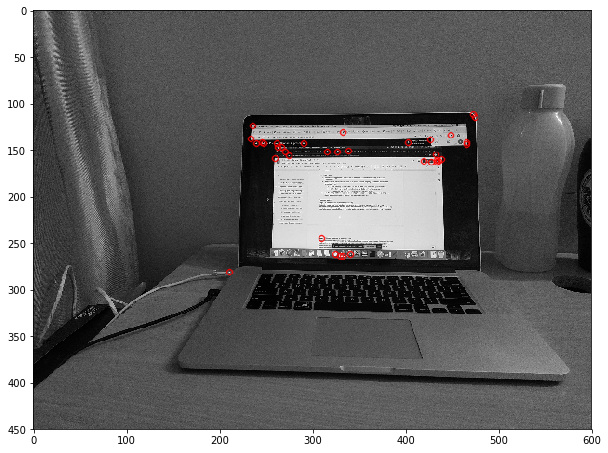

In [17]:
img2 = cv2.drawKeypoints(img, keypoints, None, color=(255, 0, 0))
plt.figure(figsize=(10, 10))
plt.imshow(img2);

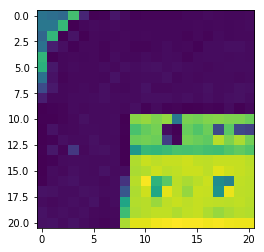

In [104]:
y, x = keypoints[2].pt
y = int(y)
x = int(x)

radius = 10

# plt.figure(figsize=(10, 10))
patch = img[x-radius:x+radius+1, y-radius:y+radius+1]
plt.imshow(patch);

centroid: [5, 3]
degrees: -59.539593512688036


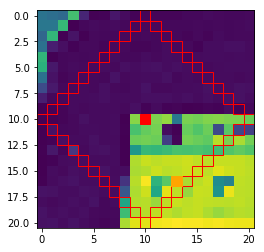

In [107]:
right = zip(range(-radius, radius+1), range(0, radius) + range(radius, -1, -1))
left = zip(range(radius-1, -radius, -1), range(-1, -radius, -1) + range(-radius, 1, 1))

circle = right + left

plt.imshow(patch)
ax = plt.gca()

cx, cy = radius, radius
p = patches.Rectangle(xy=(cx-0.5, cy-0.5), width=1, height=1, color='red')
ax.add_patch(p);

m00, m01, m10 = 0, 0, 0

for ox, oy in circle:
    p = patches.Rectangle(xy=(cx+ox-0.5, cy+oy-0.5), width=1, height=1, fill=False, color='red')
    ax.add_patch(p);
    
    _ival = patch[cx+ox, cy+oy]
    m00 += _ival
    m01 += oy * _ival
    m10 += ox * _ival
    
centroid = [m10/m00, m01/m00]
print "centroid:", centroid
print "degrees:", np.arctan2(-m10, m01) * 180 / np.pi

p = patches.Rectangle(xy=(cx+centroid[1]-0.5, cy+centroid[0]+0.5), width=1, height=1, fill=True, color='orange')
ax.add_patch(p);

[Boom Baby!](https://youtu.be/YoCpMguR4cQ?t=30)